In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [44]:
train = pd.read_csv('train.csv')

Inspecting the dataframe, to see what types of variables I will be dealing with. Immediately, I notice that the Age and Cabin columns have some missing values

In [45]:
train.head(n=25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [46]:
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [47]:
print (train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [48]:
print("Percentage of missing age values : " + str(100 - train.Age.count() / train.shape[0] * 100))
print("Percentage of missing cabin values : " + str(100 - train.Cabin.count() / train.shape[0] * 100))

Percentage of missing age values : 19.86531986531986
Percentage of missing cabin values : 77.10437710437711


It seems that Age has around 20% missing values, and cabin has around 77% missing values. Since cabin has around 77% missing values, it is better to drop this column and not use it. For the age, only 19% is missing which is not a big portion of data, so I am going to impute all the age columns with the mean of the ages in the dataset

In [29]:
train['Age'].fillna((train['Age'].mean()), inplace=True)
train.drop('Cabin',axis=1,inplace=True)

Now that I have taken care of the missing data, it is time to make some visualizations, to see if any outliers are present, and to get answer at some questions. 

First, I want to see the distribution between the survivors, and non survivors, to see if the data is balanced or unbalanced. This will be key, in sampling later on for the machine learning part.

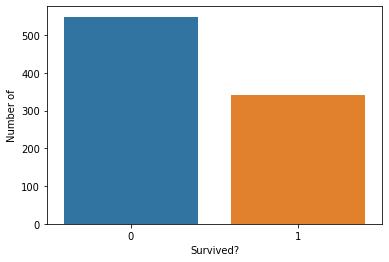

In [30]:
sns.countplot(train.Survived);
plt.xlabel('Survived?');
plt.ylabel('Number of');
plt.show()

I can see that the data is imbalanced, but not by a big part. This makes it usable for machine learning, since techniques like up-sampling dont have to be used. Now I am going to see, how much male and female passengers survived this tragedy. I expect that a lot more females survived than males.

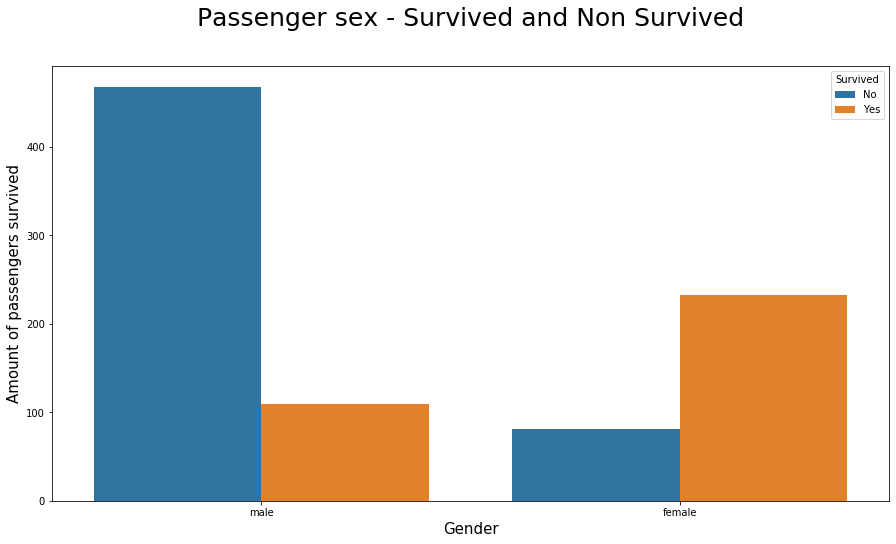

In [31]:
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=4, 
)

## Fixing title, xlabel and ylabel
plt.title("Passenger sex - Survived and Non Survived", fontsize = 25, pad=40)
plt.xlabel("Gender", fontsize = 15);
plt.ylabel("Amount of passengers survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

In the plot above, we can see a lot more females survived than males. So far the data is looking good, now I am going to look at the distribution of passenger class, and if that effected their chances of survival

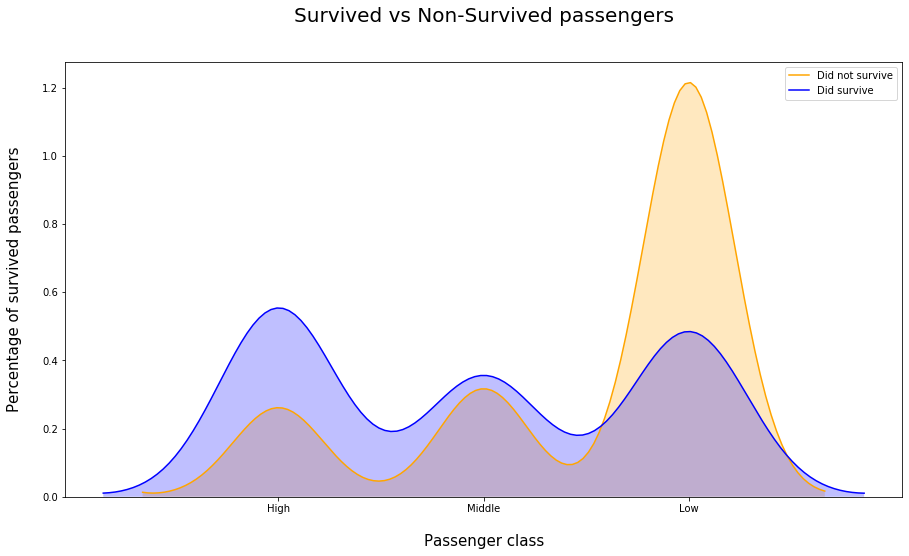

In [32]:
fig = plt.figure(figsize=(15,8),)

ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='orange',
               shade=True,
               label='Did not survive')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='blue',
               shade=True, 
               label='Did survive', 
              )
plt.title('Survived vs Non-Survived passengers', fontsize = 20, pad = 40)
plt.ylabel("Percentage of survived passengers", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger class", fontsize = 15,labelpad =20)
labels = ['High', 'Middle', 'Low']
plt.xticks(sorted(train.Pclass.unique()), labels);

It also seems that the lower class had more casualties, but the middle and high class had more survivors that casualties. So far I am not seeing any outliers.  At last, I am going to look if people that bought a ticket at a lower price had more casualties

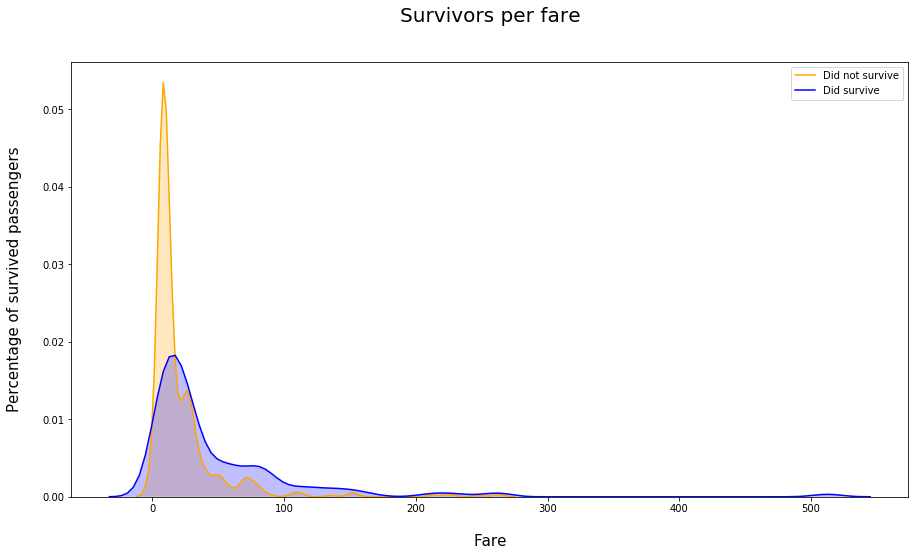

In [33]:
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='orange',shade=True,label='Did not survive')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='blue',shade=True, label='Did survive')
plt.title('Survivors per fare', fontsize = 20, pad = 40)
plt.ylabel("Percentage of survived passengers", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

In above plot, I can see that people that bought ticket at a lower price, had a much higher chance to become a victim. But there is something weird going on, the line seems to only show the blue line and hide the orange one, from 280 onwards. It goes a bit up at 500, let's see if that is an outlier.

In [49]:
train[train.Fare > 280].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Is seems there are 3 persons with a fare that is a bit too big, those people look like outliers, I am going to remove these persons since they skew the data

In [34]:
train = train[train.Fare <500]

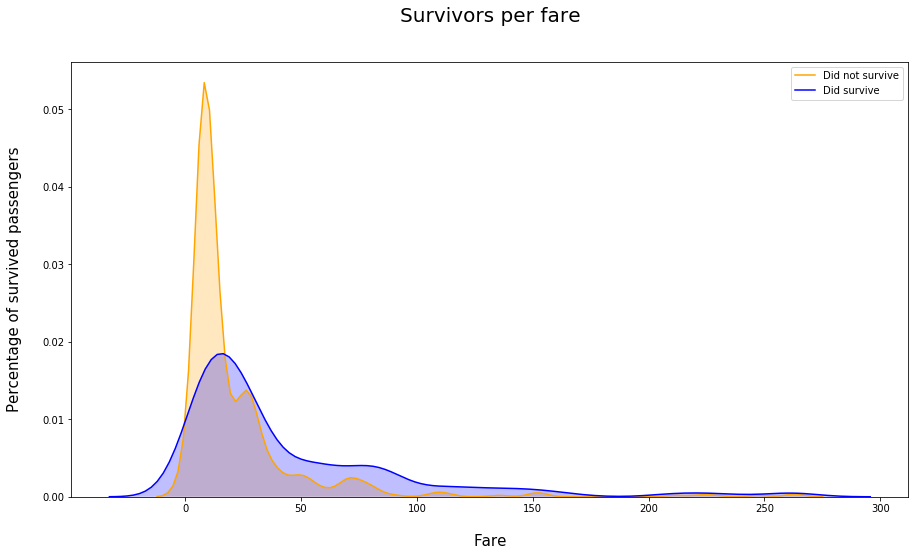

In [36]:
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='orange',shade=True,label='Did not survive')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='blue',shade=True, label='Did survive')
plt.title('Survivors per fare', fontsize = 20, pad = 40)
plt.ylabel("Percentage of survived passengers", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

The plot looks a bit better now, there were 3 outliers with a fare that was too high that could be a cause of bias for the machine learning algorith

The final step to be made is to transform the data, this dataset contains some categorical variables with cannot be processed by a Machine Learning Algorithm. I am going to use the Pandas Dummy library to convert these variables to multiple columns with a 0 or 1. Before I transform the data, I am going to remove some features that I think will be Unneccesary. The name column is of no use of the Machine Learning Algorithm, since this does not explain a bit of the target variable. Therefore I will remove this column

In [37]:
train.drop('Name',axis=1,inplace=True)
train.drop('Ticket',axis=1,inplace=True)

Afterwards, I am going to collect the labels(target variable), and save it, since this is the ground truth, which will

In [38]:
train = pd.get_dummies(train)

In [39]:
train.head(n=10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,6,0,3,29.699118,0,0,8.4583,0,1,0,1,0
6,7,0,1,54.000000,0,0,51.8625,0,1,0,0,1
7,8,0,3,2.000000,3,1,21.0750,0,1,0,0,1
8,9,1,3,27.000000,0,2,11.1333,1,0,0,0,1
9,10,1,2,14.000000,1,0,30.0708,1,0,1,0,0


I can see that some variables have ranges that are bigger than the other variables, this could cause bias in a machine learning algorithm. In order to combat this, I am going to standardize(scale) the data.

In [40]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [41]:
scaled_data

array([[-1.72828028, -0.78580299,  0.82412268, ..., -0.47771934,
        -0.30813068,  0.6155339 ],
       [-1.72439316,  1.2725836 , -1.57529024, ...,  2.09327929,
        -0.30813068, -1.62460588],
       [-1.72050605,  1.2725836 ,  0.82412268, ..., -0.47771934,
        -0.30813068,  0.6155339 ],
       ...,
       [ 1.72347392, -0.78580299,  0.82412268, ..., -0.47771934,
        -0.30813068,  0.6155339 ],
       [ 1.72736103,  1.2725836 , -1.57529024, ...,  2.09327929,
        -0.30813068, -1.62460588],
       [ 1.73124814, -0.78580299,  0.82412268, ..., -0.47771934,
         3.24537633, -1.62460588]])

The data is now ready for machine learning